In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [16]:
# suppose we have received the following data from some sensor
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)

In [48]:
# fit a polynomial of order 6
X = PolynomialFeatures(degree=6)
polynomial_x = poly_reg.fit_transform(data_x)
poly_reg.fit(polynomial_x,data_y)
model = LinearRegression()
model.fit(polynomial_x,data_y)

LinearRegression()

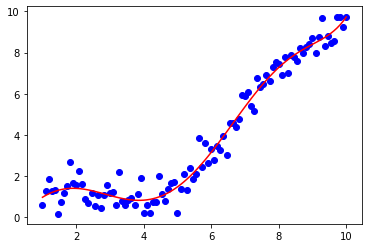

In [61]:
plt.scatter(data_x,data_y,color='b')
plt.plot(data_x,model.predict(x_poly),color='r')

In [49]:
def gradient_descent_ls(X, y, iters, alpha=0.01):
    m, n = X.shape
    theta = np.zeros(n).reshape(n,1)
    losses=[]
    
    for t in range(iters):
        yhat = X @ theta - y
        grad = (1/m) * X.T @ ((X@ theta) - y)
        theta -= alpha * grad
        losses.append(J(theta,X,y))
    return theta,losses

In [50]:
# Implement gradient computation and theta update 
def gradient_descent(X, y, theta, alpha):
    m, n = X.shape
    costs = np.zeros(10)
    for t in range(10):
        grad = np.zeros(n)
        for i in range(m):
            yhat = X[i] @ theta
            costs[t] += 1/m * (yhat - y[i])**2
            for j in range(n):
                grad[j] = grad[j] + 1/m * 2 * (yhat - y[i])*X[i,j]
        theta = theta - alpha * grad
    return theta, costs

In [62]:
# Call stochastic gradient descent in the main loop
m,n = polynomial_x.shape
LR = 0.001 
sample_size = 10
epochs = 1000

theta = np.zeros(n).reshape(n,1)
costs = []
for i in range(epochs): 
    t = np.random.choice(m,sample_size)
    x_sample = polynomial_x[t]
    y_sample = data_y[t]
    
    pred = x_sample @ theta
    grad_theta = (2/sample_size)*(x_sample.T @ (pred - y_sample))
    theta = theta - LR * grad_theta  

<ipython-input-62-b0950d3342e6>:15: RuntimeWarning: overflow encountered in matmul
  grad_theta = (2/sample_size)*(x_sample.T @ (pred - y_sample))
<ipython-input-62-b0950d3342e6>:16: RuntimeWarning: invalid value encountered in subtract
  theta = theta - LR * grad_theta


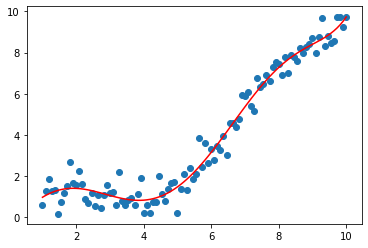

In [67]:
# predict y_hat using test_x and theta 
y_hat = model.predict(polynomial_x)

# plot x vs y in blue
# plot x vs y_hat in red
plt.scatter(data_x,data_y)
plt.plot(data_x,y_hat,'r')